In [1]:
import os 
import glob 
import json 
from typing import List, Dict
import warnings

directories = paths = ["/data0/shypula/prog_diversity/all_experiments/Open_Ended_Reevaluation_EAD_Open_and_Commercial_2024-08-02_16-02-07/", 
                        "/data1/shypula/prog_diversity/all_experiments/OpenEndedCommercialV3_2024-08-09_02-28-20/"]


key_columns = ["all_semantic_count_wcoh_nonempty_woutput", "all_average_cosine_distance_programs", "all_average_cosine_distance_raw", 
               "all_average_cosine_distance_programs_zero_null", 
               "all_ead_4_bootstrap", "all_stripped_subtrees_4_bootstrap", 
               "generations", "extracted_programs", "experiment_name", "problem_id"]


def read_tsv_file(file_path):
    """
    Read a TSV file and return all key-value pairs as a dictionary.
    """
    result_dict = {}
    with open(file_path, 'r') as f:
        for line in f:
            key, value = line.strip().split('\t')
            result_dict[key] = value
    return result_dict

# def make_semantic_strings(output_records: List[Dict]):
#     program_2_semantic_string = {}
#     semantic_strings_2_programs = defaultdict(list)
#     for output_record in output_records:
#         semantic_string = ""
#         for testcase_id, testcase_input in output_record["testcase_inputs"].items():
#             testcase_output = output_record["testcase_outputs"][testcase_id]
#             semantic_string += f"testcase_input: {testcase_input}, output: {testcase_output}\n"
#         program_2_semantic_string[output_record["code"]] = semantic_string
#         semantic_strings_2_programs[semantic_string].append(output_record["code"])
#     return program_2_semantic_string, semantic_strings_2_programs

def output_record_to_semantic_string(output_record: Dict):
    semantic_string = ""
    all_keys = list(output_record["testcase_outputs"].keys())
    all_keys.sort()
    for testcase_id in all_keys:
        testcase_input = output_record["testcase_inputs"][testcase_id]
        testcase_output = output_record["testcase_outputs"][testcase_id]
        semantic_string += f"testcase_input: {testcase_input}, output: {testcase_output}\n"
    return semantic_string


experiment_dirs = []
for directory in directories:
    ds = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    ds = [os.path.join(directory, d) for d in ds]
    experiment_dirs.extend(ds)

all_results = []
all_pairs = []

from tqdm import tqdm
import re 
import json
    
# pbar = tqdm(total=len(experiment_dirs))
# number_experiment_x_problem = 0
# for i, directory in enumerate(experiment_dirs):
#     for problem_dir in glob.glob(os.path.join(directory, "p*")):
#         number_experiment_x_problem += 1
# print(f"Number of experiments x problems: {number_experiment_x_problem}")
# pbar = tqdm(total=number_experiment_x_problem)
# for i, directory in enumerate(experiment_dirs):
#     # results_tsvs = glob.glob(os.path.join(directory, "p*", "result.tsv"))
#     # if i < 5:
#     #     print(f"Found {len(results_tsvs)} result.tsv files in {directory}")
    
#     # for tsv_path in results_tsvs:
#     #     result = read_tsv_file(tsv_path)
#     #     all_results.append(result)
#     experiment_name = os.path.basename(directory)
#     problem_dirs = glob.glob(os.path.join(directory, "p*"))
#     for problem_dir in problem_dirs:
#         problem_id = os.path.basename(problem_dir)
#         generation_dirs = glob.glob(os.path.join(problem_dir, "generation_*"))
#         # assert len(generation_dirs) == 100, f"Expected 100 generation directories, but found {len(generation_dirs)} in {problem_dir}"
#         # if len(generation_dirs) != 100:
#         #     warnings.warn(f"Expected 100 generation directories, but found {len(generation_dirs)} in {problem_dir}")
#         generation_tuples = []
#         for gen_dir in generation_dirs:
#             # generation_38_coh_float 
#             gen_id = re.search(r"generation_(\d+)_", gen_dir).group(1)
#             if int(gen_id) < 0 or int(gen_id) >= 100:
#                 continue
#             extracted_program_path = os.path.join(gen_dir, "prog.txt")
#             # assert os.path.exists(extracted_program_path), f"Expected extracted program at {extracted_program_path}"
#             if not os.path.exists(extracted_program_path):
#                 # warnings.warn(f"Expected extracted program at {extracted_program_path}")
#                 continue
#             with open(extracted_program_path, 'r') as f:
#                 extracted_program = f.read().strip()
#             if extracted_program == "":
#                 continue
#             generation_result_path = os.path.join(gen_dir, "output_record.json")
#             with open(generation_result_path, 'r') as f:
#                 generation_result = json.load(f)
#             semantic_string = output_record_to_semantic_string(generation_result)
#             generation_tuples.append((gen_id, extracted_program, semantic_string))
#         for (i, prog_i, sem_str_i) in generation_tuples:
#             for (j, prog_j, sem_str_j) in generation_tuples:
#                 if i != j: 
#                     all_pairs.append({
#                         "experiment_name": experiment_name,
#                         "problem_id": problem_id,
#                         "gen_i": i,
#                         "gen_j": j,
#                         "prog_i": prog_i,
#                         "prog_j": prog_j,
#                         "sem_str_i": sem_str_i,
#                         "sem_str_j": sem_str_j
#                     })
#         pbar.update(1)
#         pbar.set_description(f"Currently have {len(all_pairs)} pairs")
            
            
    #     tsv_path = os.path.join(problem_dir, "result.tsv")
    #     result = read_tsv_file(tsv_path)
    #     generation_paths = glob.glob(os.path.join(problem_dir, "generated", "gen_*.txt"))
    #     extracted_program_paths = glob.glob(os.path.join(problem_dir, "generated", "prog_*.txt"))
    #     assert len(generation_paths) == len(extracted_program_paths) == 100, f"Expected 100 generations and extracted programs, but found {len(generation_paths)} generations and {len(extracted_program_paths)} extracted programs in {problem_dir}"
    #     generations = []
    #     extracted_programs = []
    #     for gen_path in generation_paths:
    #         with open(gen_path, 'r') as f:
    #             generations.append(f.read().strip())
    #     for prog_path in extracted_program_paths:
    #         with open(prog_path, 'r') as f:
    #             extracted_programs.append(f.read().strip())
    #     result["experiment_name"] = experiment_name 
    #     result["problem_id"] = problem_id
    #     result["generations"] = generations
    #     result["extracted_programs"] = extracted_programs
        
    #     all_results.append(result)
    # pbar.update(1)
                
        
        
    
# filtered_result_dicts = [{k: v for k, v in result.items() if k in key_columns} for result in all_results]        
    
    
    


In [ ]:
# equal_pairs = [p for p in all_pairs if p["sem_str_i"] == p["sem_str_j"]]
# not_equal_pairs = [p for p in all_pairs if p["sem_str_i"] != p["sem_str_j"]]
# output_dir = "/data0/shypula/prog_diversity/codebertscore_vs_semantic_analysis"
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# with open(os.path.join(output_dir, "all_pairs.json"), 'w') as f:
#     json.dump(all_pairs, f)
# with open(os.path.join(output_dir, "equal_pairs.json"), 'w') as f:
#     json.dump(equal_pairs, f)
# with open(os.path.join(output_dir, "not_equal_pairs.json"), 'w') as f:
#     json.dump(not_equal_pairs, f)
# print(f"Found {len(all_pairs)} pairs, {len(equal_pairs)} equal pairs, and {len(not_equal_pairs)} not equal pairs")

In [ ]:
output_dir = "/data0/shypula/prog_diversity/codebertscore_vs_semantic_analysis"
# with open(os.path.join(output_dir, "equal_pairs_shuffled.json"), 'w') as f:
#     # sample 5000 pairs or all pairs if less than 5000
#     json.dump(equal_pairs[:5000], f)
#     print(f"Saved shuffled equal pairs to {os.path.join(output_dir, 'equal_pairs_shuffled.json')}")
# with open(os.path.join(output_dir, "not_equal_pairs_shuffled.json"), 'w') as f:
#     # sample 5000 pairs or all pairs if less than 5000
#     json.dump(not_equal_pairs[:5000], f)
#     print(f"Saved shuffled not equal pairs to {os.path.join(output_dir, 'not_equal_pairs_shuffled.json')}")

import json 
with open(os.path.join(output_dir, "equal_pairs_shuffled.json"), 'r') as f:
    equal_pairs = json.load(f)
with open(os.path.join(output_dir, "not_equal_pairs_shuffled.json"), 'r') as f:
    not_equal_pairs = json.load(f)
print(f"Loaded {len(equal_pairs)} equal pairs and {len(not_equal_pairs)} not equal pairs")

KeyboardInterrupt: 

In [ ]:
# input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device)
#     target_ids = input_ids.clone()
#     target_ids[:, :-trg_len] = -100

#     with torch.no_grad():
#         outputs = model(input_ids, labels=target_ids)

#         # loss is calculated using CrossEntropyLoss which averages over valid labels
#         # N.B. the model only calculates loss over trg_len - 1 labels, because it internally shifts the labels
#         # to the left by 1.
#         neg_log_likelihood = outputs.loss

In [1]:

from transformers import AutoTokenizer, AutoModelForCausalLM
model_id = "codellama/CodeLlama-7b-hf"
device = "cuda:0" # for GPU usage or "cpu" for CPU usage

tokenizer = AutoTokenizer.from_pretrained(model_id)
llm_model = AutoModelForCausalLM.from_pretrained(model_id).to(device)
max_len = 512
import torch 

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:

tokenizer.pad_token = tokenizer.eos_token


input_ids = ["def factorial(n):\n    if n == 0:\n        return 1\n    return n * factorial(n - 1)\n", "def recursive_sum(l):\n    if len(l) == 0:\n        return 0\n    return l[0] + recursive_sum(l[1:])\n"]
input_ids = tokenizer(input_ids, return_tensors="pt", padding=True, truncation=True, max_length=max_len, return_token_type_ids=False, return_attention_mask=False)
input_ids = input_ids.input_ids.to(device)
target_ids = input_ids.clone()
target_ids[:, :-1] = -100
print(f"Input Ids are: {input_ids}")


with torch.no_grad():
    outputs = llm_model(input_ids, labels=target_ids)
    logits = outputs.logits
    mask = target_ids != tokenizer.eos_token_id
    print(f"Mask shape: {mask.shape}")
    print(f"Mask: {mask}")  
    losses = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), target_ids.view(-1), reduction="none").view(target_ids.size())
    print(f"Losses shape: {losses.shape}")
    masked_losses = losses * mask
    print(f"Masked losses shape: {masked_losses.shape}")
    # element wise loss 
    element_wise_loss = torch.sum(masked_losses, dim=1)
    element_wise_mean_loss = element_wise_loss / torch.sum(mask, dim=1)
    print(f"Element wise mean loss shape: {element_wise_mean_loss.shape}")
    print(f"Element wise mean loss: {element_wise_mean_loss}")
    elemet_wise_ppl = torch.exp(element_wise_loss / torch.sum(mask, dim=1))
    print(f"Element wise loss shape: {element_wise_loss.shape}")
    print(f"Element wise PPL shape: {elemet_wise_ppl.shape}")
    print(f"Element wise PPL: {elemet_wise_ppl}")
    print(f"Element wise loss: {element_wise_loss}")
    

Input Ids are: tensor([[    2,     2,     2,     2,     2,     2,     2,     2,     1,   822,
          7329,   616, 29898, 29876,  1125,    13,  1678,   565,   302,  1275,
         29871, 29900, 29901,    13,  4706,   736, 29871, 29896,    13,  1678,
           736,   302,   334,  7329,   616, 29898, 29876,   448, 29871, 29896,
         29897,    13],
        [    1,   822, 16732, 29918,  2083, 29898, 29880,  1125,    13,  1678,
           565,  7431, 29898, 29880, 29897,  1275, 29871, 29900, 29901,    13,
          4706,   736, 29871, 29900,    13,  1678,   736,   301, 29961, 29900,
         29962,   718, 16732, 29918,  2083, 29898, 29880, 29961, 29896, 29901,
          2314,    13]], device='cuda:0')
Mask shape: torch.Size([2, 42])
Mask: tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
      

In [10]:

from transformers import AutoTokenizer, AutoModelForCausalLM
model_id = "Salesforce/codegen2-1B_P"
device = "cuda:1" # for GPU usage or "cpu" for CPU usage

codegen_tokenizer = AutoTokenizer.from_pretrained(model_id)
llm_model_codegen = AutoModelForCausalLM.from_pretrained(model_id).to(device)
max_len = 512
import torch 

In [12]:

codegen_tokenizer.pad_token = codegen_tokenizer.eos_token


input_ids = ["def factorial(n):\n    if n == 0:\n        return 1\n    return n * factorial(n - 1)\n", "def recursive_sum(l):\n    if len(l) == 0:\n        return 0\n    return l[0] + recursive_sum(l[1:])\n"]
input_ids = codegen_tokenizer(input_ids, return_tensors="pt", padding=True, truncation=True, max_length=max_len, return_token_type_ids=False, return_attention_mask=False)
input_ids = input_ids.input_ids.to(device)
target_ids = input_ids.clone()
target_ids[:, :-1] = -100
print(f"Input Ids are: {input_ids}")


with torch.no_grad():
    outputs = llm_model_codegen(input_ids, labels=target_ids)
    logits = outputs.logits
    mask = target_ids != tokenizer.eos_token_id
    print(f"Mask shape: {mask.shape}")
    print(f"Mask: {mask}")  
    losses = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), target_ids.view(-1), reduction="none").view(target_ids.size())
    print(f"Losses shape: {losses.shape}")
    masked_losses = losses * mask
    print(f"Masked losses shape: {masked_losses.shape}")
    # element wise loss 
    element_wise_loss = torch.sum(masked_losses, dim=1)
    element_wise_mean_loss = element_wise_loss / torch.sum(mask, dim=1)
    print(f"Element wise mean loss shape: {element_wise_mean_loss.shape}")
    print(f"Element wise mean loss: {element_wise_mean_loss}")
    elemet_wise_ppl = torch.exp(element_wise_loss / torch.sum(mask, dim=1))
    print(f"Element wise loss shape: {element_wise_loss.shape}")
    print(f"Element wise PPL shape: {elemet_wise_ppl.shape}")
    print(f"Element wise PPL: {elemet_wise_ppl}")
    print(f"Element wise mean loss: {element_wise_mean_loss}")
    print(f"Element wise loss: {element_wise_loss}")
    

Input Ids are: tensor([[ 4299,  1109,  5132,     7,    77,  2599,   198, 50284,   361,   299,
          6624,   657,    25,   198, 50280,  7783,   352,   198, 50284,  7783,
           299,  1635,  1109,  5132,     7,    77,   532,   352,     8,   198,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256],
        [ 4299, 45115,    62, 16345,     7,    75,  2599,   198, 50284,   361,
         18896,     7,    75,     8,  6624,   657,    25,   198, 50280,  7783,
           657,   198, 50284,  7783,   300,    58,    15,    60,  1343, 45115,
            62, 16345,     7,    75,    58,    16,    25, 12962,   198]],
       device='cuda:1')
Mask shape: torch.Size([2, 39])
Mask: tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True],
        [True, True, True, True

In [4]:


example_pairs = [{"prog_i": "def factorial(n):\n    if n == 0:\n        return 1\n    return n * factorial(n - 1)\n", 
                  "prog_j": "def recursive_sum(l):\n    if len(l) == 0:\n        return 0\n    return l[0] + recursive_sum(l[1:])\n"}, 
                    {"prog_i": "def sort_list(l):\n    return sorted(l)\n",
                        "prog_j": "def sieve_of_eratosthenes(n):\n    primes = []\n    for i in range(2, n + 1):\n        if all(i % p != 0 for p in primes):\n            primes.append(i)\n    return primes\n"}]

    
prog_i_list = [p["prog_i"] for p in example_pairs]
prog_j_list = [p["prog_j"] for p in example_pairs]

input_ids = tokenizer(prog_i_list, return_tensors="pt", padding=True, truncation=True, max_length=max_len, return_token_type_ids=False, return_attention_mask=False)
input_ids = input_ids.input_ids.to("cuda:0")
target_ids = input_ids.clone()
target_ids[:, :-1] = -100
print(f"Input Ids are: {input_ids}")

with torch.no_grad():
    outputs = llm_model(input_ids, labels=target_ids)
    logits = outputs.logits
    mask = target_ids != tokenizer.eos_token_id
    print(f"Mask shape: {mask.shape}")
    print(f"Mask: {mask}")  
    losses = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), target_ids.view(-1), reduction="none").view(target_ids.size())
    print(f"Losses shape: {losses.shape}")
    masked_losses = losses * mask
    print(f"Masked losses shape: {masked_losses.shape}")
    # element wise loss 
    element_wise_loss = torch.sum(masked_losses, dim=1)
    element_wise_mean_loss = element_wise_loss / torch.sum(mask, dim=1)
    print(f"Element wise mean loss shape: {element_wise_mean_loss.shape}")
    print(f"Element wise mean loss: {element_wise_mean_loss}")
    elemet_wise_ppl = torch.exp(element_wise_loss / torch.sum(mask, dim=1))
    print(f"Element wise loss shape: {element_wise_loss.shape}")
    print(f"Element wise PPL shape: {elemet_wise_ppl.shape}")
    print(f"Element wise PPL: {elemet_wise_ppl}")
    print(f"Element wise mean loss: {element_wise_mean_loss}")
    print(f"Element wise loss: {element_wise_loss}")

Input Ids are: tensor([[    1,   822,  7329,   616, 29898, 29876,  1125,    13,  1678,   565,
           302,  1275, 29871, 29900, 29901,    13,  4706,   736, 29871, 29896,
            13,  1678,   736,   302,   334,  7329,   616, 29898, 29876,   448,
         29871, 29896, 29897,    13],
        [    2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     1,   822,
          2656, 29918,  1761, 29898, 29880,  1125,    13,  1678,   736, 12705,
         29898, 29880, 29897,    13]], device='cuda:0')
Mask shape: torch.Size([2, 34])
Mask: tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, Tru

In [5]:
def get_ppl_for_list(prog_list, model, tokenizer, device):
    input_ids = tokenizer(prog_list, return_tensors="pt", padding=True, truncation=True, max_length=max_len, return_token_type_ids=False, return_attention_mask=False)
    input_ids = input_ids.input_ids.to(device)
    target_ids = input_ids.clone()
    target_ids[:, :-1] = -100
    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)
        logits = outputs.logits
        mask = target_ids != tokenizer.eos_token_id
        losses = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), target_ids.view(-1), reduction="none").view(target_ids.size())
        masked_losses = losses * mask
        element_wise_loss = torch.sum(masked_losses, dim=1)
        element_wise_mean_loss = element_wise_loss / torch.sum(mask, dim=1)
        element_wise_ppl = torch.exp(element_wise_loss / torch.sum(mask, dim=1))
    return element_wise_ppl, element_wise_mean_loss

ppl_i, mean_loss_i = get_ppl_for_list(prog_i_list, llm_model, tokenizer, "cuda:0")
print(f"Prog i PPL: {ppl_i}")
print(f"Prog i mean loss: {mean_loss_i}")
ppl_j, mean_loss_j = get_ppl_for_list(prog_j_list, llm_model, tokenizer, "cuda:0")
print(f"Prog j PPL: {ppl_j}")
print(f"Prog j mean loss: {mean_loss_j}")

Prog i PPL: tensor([1.0031, 1.0706], device='cuda:0')
Prog i mean loss: tensor([0.0031, 0.0682], device='cuda:0')
Prog j PPL: tensor([1.0702, 1.0018], device='cuda:0')
Prog j mean loss: tensor([0.0679, 0.0018], device='cuda:0')


In [35]:


def ppl_for_pairs(pairs, model, tokenizer, device):
    prog_1_list = [p["prog_i"] for p in pairs]
    prog_2_list = [p["prog_j"] for p in pairs]
    ppl_1, mean_loss_1 = get_ppl_for_list(prog_1_list, model, tokenizer, device)
    ppl_2, mean_loss_2 = get_ppl_for_list(prog_2_list, model, tokenizer, device)
    ppls = torch.stack([ppl_1, ppl_2], dim=1)
    ppls = ppls.cpu().numpy()
    ppls = ppls.tolist()
    
    for i, p in enumerate(pairs):
        p["ppl_i"] = ppls[i][0]
        p["ppl_j"] = ppls[i][1]
        
    return pairs


example_pairs = [{"prog_i": "def factorial(n):\n    if n == 0:\n        return 1\n    return n * factorial(n - 1)\n", 
                  "prog_j": "def recursive_sum(l):\n    if len(l) == 0:\n        return 0\n    return l[0] + recursive_sum(l[1:])\n",
                 "sem_str_i": "testcase_input: 5, output: 120\ntestcase_input: 4, output: 24\ntestcase_input: 3, output: 6\ntestcase_input: 2, output: 2\ntestcase_input: 1, output: 1\ntestcase_input: 0, output: 1\n",
                    "sem_str_j": "testcase_input: [1, 2, 3, 4, 5], output: 15\ntestcase_input: [1, 2, 3, 4], output: 10\ntestcase_input: [1, 2, 3], output: 6\ntestcase_input: [1, 2], output: 3\ntestcase_input: [1], output: 1\ntestcase_input: [], output: 0\n"},
                 
                    {"prog_i": "def sort_list(l):\n    return sorted(l)\n",
                        "prog_j": "def sieve_of_eratosthenes(n):\n    primes = []\n    for i in range(2, n + 1):\n        if all(i % p != 0 for p in primes):\n            primes.append(i)\n    return primes\n", 
                        "sem_str_i": "testcase_input: [1, 2, 3, 4, 5], output: [1, 2, 3, 4, 5]\ntestcase_input: [5, 4, 3, 2, 1], output: [1, 2, 3, 4, 5]\ntestcase_input: [1, 3, 2, 5, 4], output: [1, 2, 3, 4, 5]\ntestcase_input: [1, 2, 3, 4, 5], output: [1, 2, 3, 4, 5]\ntestcase_input: [5, 4, 3, 2, 1], output: [1, 2, 3, 4, 5]\ntestcase_input: [1, 3, 2, 5, 4], output: [1, 2, 3, 4, 5]\n",
                        "sem_str_j": "testcase_input: 10, output: [2, 3, 5, 7]\ntestcase_input: 20, output: [2, 3, 5, 7, 11, 13, 17, 19]\ntestcase_input: 30, output: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]\ntestcase_input: 10, output: [2, 3, 5, 7]\ntestcase_input: 20, output: [2, 3, 5, 7, 11, 13, 17, 19]\ntestcase_input: 30, output: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]\n"}, 
                    {"prog_i": "def gauss_sum_slow(n):\n    return sum(range(n + 1))\n",
                        "prog_j": "def gauss_sum_fast(n):\n    return n * (n + 1) // 2\n", 
                        "sem_str_i": "testcase_input: 5, output: 15\ntestcase_input: 10, output: 55\ntestcase_input: 100, output: 5050\ntestcase_input: 5, output: 15\ntestcase_input: 10, output: 55\ntestcase_input: 100, output: 5050\n",
                        "sem_str_j": "testcase_input: 5, output: 15\ntestcase_input: 10, output: 55\ntestcase_input: 100, output: 5050\ntestcase_input: 5, output: 15\ntestcase_input: 10, output: 55\ntestcase_input: 100, output: 5050\n"}]
example_pairs = ppl_for_pairs(example_pairs, llm_model, tokenizer, "cuda:0")
print(example_pairs)

example_pairs_codegen = ppl_for_pairs(example_pairs, llm_model_codegen, codegen_tokenizer, "cuda:1")
print(example_pairs_codegen)

    


[{'prog_i': 'def factorial(n):\n    if n == 0:\n        return 1\n    return n * factorial(n - 1)\n', 'prog_j': 'def recursive_sum(l):\n    if len(l) == 0:\n        return 0\n    return l[0] + recursive_sum(l[1:])\n', 'sem_str_i': 'testcase_input: 5, output: 120\ntestcase_input: 4, output: 24\ntestcase_input: 3, output: 6\ntestcase_input: 2, output: 2\ntestcase_input: 1, output: 1\ntestcase_input: 0, output: 1\n', 'sem_str_j': 'testcase_input: [1, 2, 3, 4, 5], output: 15\ntestcase_input: [1, 2, 3, 4], output: 10\ntestcase_input: [1, 2, 3], output: 6\ntestcase_input: [1, 2], output: 3\ntestcase_input: [1], output: 1\ntestcase_input: [], output: 0\n', 'ppl_i': 1.0031399726867676, 'ppl_j': 1.0702177286148071}, {'prog_i': 'def sort_list(l):\n    return sorted(l)\n', 'prog_j': 'def sieve_of_eratosthenes(n):\n    primes = []\n    for i in range(2, n + 1):\n        if all(i % p != 0 for p in primes):\n            primes.append(i)\n    return primes\n', 'sem_str_i': 'testcase_input: [1, 2, 3, 

In [44]:
import code_bert_score 

def code_bert_score_for_pairs(pairs, device="cuda:0"):
    # predictions = ...
    # references = ...

    # score_results = code_bert_score.score(cands=predictions,
    #                                         refs=references,
    #                                         no_punc=True,
    #                                         lang='python')
    predictions = [p["prog_j"] for p in pairs]
    references = [p["prog_i"] for p in pairs]
    score_results = code_bert_score.score(cands=predictions,
                                            refs=references,
                                            no_punc=True,
                                            lang='python')
    
    # print(f"Score results: {score_results}")
    for i, p in enumerate(pairs):
        p["code_bert_score"] = score_results[0][i]
    return pairs

example_pairs = code_bert_score_for_pairs(example_pairs, "cuda:2") 
print(example_pairs)

[{'prog_i': 'def factorial(n):\n    if n == 0:\n        return 1\n    return n * factorial(n - 1)\n', 'prog_j': 'def recursive_sum(l):\n    if len(l) == 0:\n        return 0\n    return l[0] + recursive_sum(l[1:])\n', 'sem_str_i': 'testcase_input: 5, output: 120\ntestcase_input: 4, output: 24\ntestcase_input: 3, output: 6\ntestcase_input: 2, output: 2\ntestcase_input: 1, output: 1\ntestcase_input: 0, output: 1\n', 'sem_str_j': 'testcase_input: [1, 2, 3, 4, 5], output: 15\ntestcase_input: [1, 2, 3, 4], output: 10\ntestcase_input: [1, 2, 3], output: 6\ntestcase_input: [1, 2], output: 3\ntestcase_input: [1], output: 1\ntestcase_input: [], output: 0\n', 'ppl_i': 1.0031399726867676, 'ppl_j': 1.0702177286148071, 'code_bert_score': tensor(0.8320), 'prog_i_length': 42, 'prog_j_length': 51, 'semantic_similarity': 0, 'max_ppl': 1.0702177286148071, 'mean_ppl': 1.0366788506507874, 'max_excess_len': 0, 'mean_excess_len': 0.0}, {'prog_i': 'def sort_list(l):\n    return sorted(l)\n', 'prog_j': 'def s

In [37]:
codebertscore_tokenizer = AutoTokenizer.from_pretrained("neulab/codebert-python")

In [38]:
def get_lengths_by_tokenizer(pairs, tokenizer): 
    prog_1_list = [p["prog_i"] for p in pairs]
    prog_2_list = [p["prog_j"] for p in pairs]
    prog_1_lengths = []
    prog_2_lengths = []
    for prog in prog_1_list:
        prog_1_lengths.append(len(tokenizer(prog)["input_ids"]))
    for prog in prog_2_list:
        prog_2_lengths.append(len(tokenizer(prog)["input_ids"]))
    for i, p in enumerate(pairs):
        p["prog_i_length"] = prog_1_lengths[i]
        p["prog_j_length"] = prog_2_lengths[i]
    return pairs

In [39]:

def process_batch(pairs, model, tokenizer, model_device, codebertscore_device, len_tokenizer, max_len=512): 
    pairs = ppl_for_pairs(pairs, model, tokenizer, model_device)
    pairs = code_bert_score_for_pairs(pairs, codebertscore_device)
    pairs = get_lengths_by_tokenizer(pairs, len_tokenizer)
    # for each pair check if the sem string is the same
    for p in pairs:
        if p["sem_str_i"] == p["sem_str_j"]:
            p["semantic_similarity"] = 1
        else:
            p["semantic_similarity"] = 0
        p["max_ppl"] = max(p["ppl_i"], p["ppl_j"])
        p["mean_ppl"] = (p["ppl_i"] + p["ppl_j"]) / 2
        len1, len2 = p["prog_i_length"], p["prog_j_length"]
        max_excess_len = max(0, len1 - max_len, len2 - max_len)
        mean_excess_len = (max(0, len1 - max_len) + max(0, len2 - max_len)) / 2
        p["max_excess_len"] = max_excess_len
        p["mean_excess_len"] = mean_excess_len
    return pairs

example_pairs = process_batch(example_pairs, llm_model, tokenizer, "cuda:0", "cuda:2", codebertscore_tokenizer, max_len=512)
for p in example_pairs:
    for k in ["ppl_i", "ppl_j", "code_bert_score", "semantic_similarity", "max_ppl", "mean_ppl", "max_excess_len", "mean_excess_len"]:
        print(f"{k}: {p[k]}")

Score results: (tensor([0.8320, 0.6363, 0.8982]), tensor([0.8224, 0.7453, 0.9335]), tensor([0.8271, 0.6865, 0.9155]), tensor([0.8233, 0.7328, 0.9298]))
ppl_i: 1.0031399726867676
ppl_j: 1.0702177286148071
code_bert_score: 0.8319668769836426
semantic_similarity: 0
max_ppl: 1.0702177286148071
mean_ppl: 1.0366788506507874
max_excess_len: 0
mean_excess_len: 0.0
ppl_i: 1.070618748664856
ppl_j: 1.0017564296722412
code_bert_score: 0.6363314390182495
semantic_similarity: 0
max_ppl: 1.070618748664856
mean_ppl: 1.0361875891685486
max_excess_len: 0
mean_excess_len: 0.0
ppl_i: 1.0474294424057007
ppl_j: 1.374232292175293
code_bert_score: 0.8982317447662354
semantic_similarity: 1
max_ppl: 1.374232292175293
mean_ppl: 1.2108308672904968
max_excess_len: 0
mean_excess_len: 0.0


In [40]:
import json 
with open("/data0/shypula/prog_diversity/codebertscore_vs_semantic_analysis/equal_pairs_300_sample.json", 'r') as f:
    equal_pairs = json.load(f)
with open("/data0/shypula/prog_diversity/codebertscore_vs_semantic_analysis/not_equal_pairs_300_sample.json", 'r') as f:
    not_equal_pairs = json.load(f)
print(f"Loaded {len(equal_pairs)} equal pairs and {len(not_equal_pairs)} not equal pairs")

Loaded 300 equal pairs and 300 not equal pairs


In [41]:
from tqdm import tqdm 

In [64]:
all_pairs = equal_pairs + not_equal_pairs

# remove all pairs with empty prog_i or prog_j
old_len = len(all_pairs)
all_pairs = [p for p in all_pairs if len(p["prog_i"].strip()) > 10 and len(p["prog_j"].strip()) > 10]
print(f"Removed {old_len - len(all_pairs)} pairs with empty prog_i or prog_j")

final_pairs = []

batch_size = 20
pbar = tqdm(total=len(all_pairs))

for i in range(0, len(all_pairs), batch_size):
    batch = all_pairs[i:i + batch_size]
    batch = process_batch(batch, llm_model, tokenizer, "cuda:0", "cuda:2", codebertscore_tokenizer, max_len=512)
    final_pairs.extend(batch)
    pbar.update(batch_size)
    if i % 100 == 0:
        print(f"Processed {i} pairs")
    

Removed 16 pairs with empty prog_i or prog_j


608it [26:55,  2.66s/it]00:00<?, ?it/s]
  3%|▎         | 20/584 [00:17<08:26,  1.11it/s]

Processed 0 pairs


 21%|██        | 120/584 [01:44<06:45,  1.14it/s]

Processed 100 pairs


 38%|███▊      | 220/584 [03:11<05:18,  1.14it/s]

Processed 200 pairs


 55%|█████▍    | 320/584 [04:38<03:45,  1.17it/s]

Processed 300 pairs


 72%|███████▏  | 420/584 [06:03<02:20,  1.17it/s]

Processed 400 pairs


 89%|████████▉ | 520/584 [07:28<00:54,  1.18it/s]

Processed 500 pairs


600it [08:25,  1.51it/s]                         

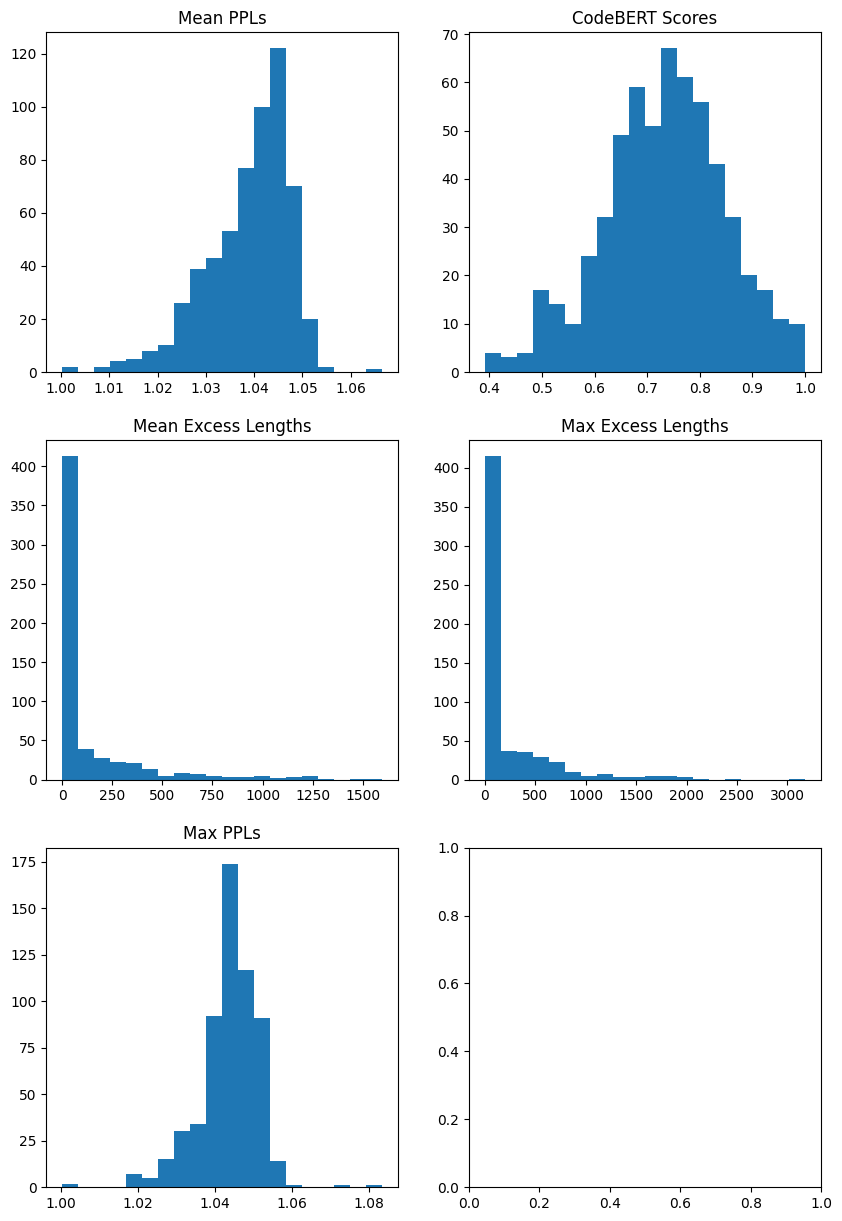

In [65]:
# plot the histograms of all the mean ppls, codebert scores, mean excess lengths, and max excess lengths, max ppls too 
import matplotlib.pyplot as plt
import numpy as np

mean_ppls = [p["mean_ppl"] for p in final_pairs]
code_bert_scores = [p["code_bert_score"] for p in final_pairs]
mean_excess_lengths = [p["mean_excess_len"] for p in final_pairs]
max_excess_lengths = [p["max_excess_len"] for p in final_pairs]
max_ppls = [p["max_ppl"] for p in final_pairs]

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
axs[0, 0].hist(mean_ppls, bins=20)
axs[0, 0].set_title("Mean PPLs")
axs[0, 1].hist(code_bert_scores, bins=20)
axs[0, 1].set_title("CodeBERT Scores")
axs[1, 0].hist(mean_excess_lengths, bins=20)
axs[1, 0].set_title("Mean Excess Lengths")
axs[1, 1].hist(max_excess_lengths, bins=20)
axs[1, 1].set_title("Max Excess Lengths")
axs[2, 0].hist(max_ppls, bins=20)
axs[2, 0].set_title("Max PPLs")
plt.show()


In [69]:
# correlation between the codebertscore and the semantic similarity
from scipy.stats import pearsonr
code_bert_scores = np.array([p["code_bert_score"] for p in final_pairs])
semantic_similarity = np.array([p["semantic_similarity"] for p in final_pairs])

pearson_corr, _ = pearsonr(code_bert_scores, semantic_similarity)
print(f"Pearson correlation between codebertscore and semantic similarity: {pearson_corr}")





Pearson correlation between codebertscore and semantic similarity: -0.08496732934842881


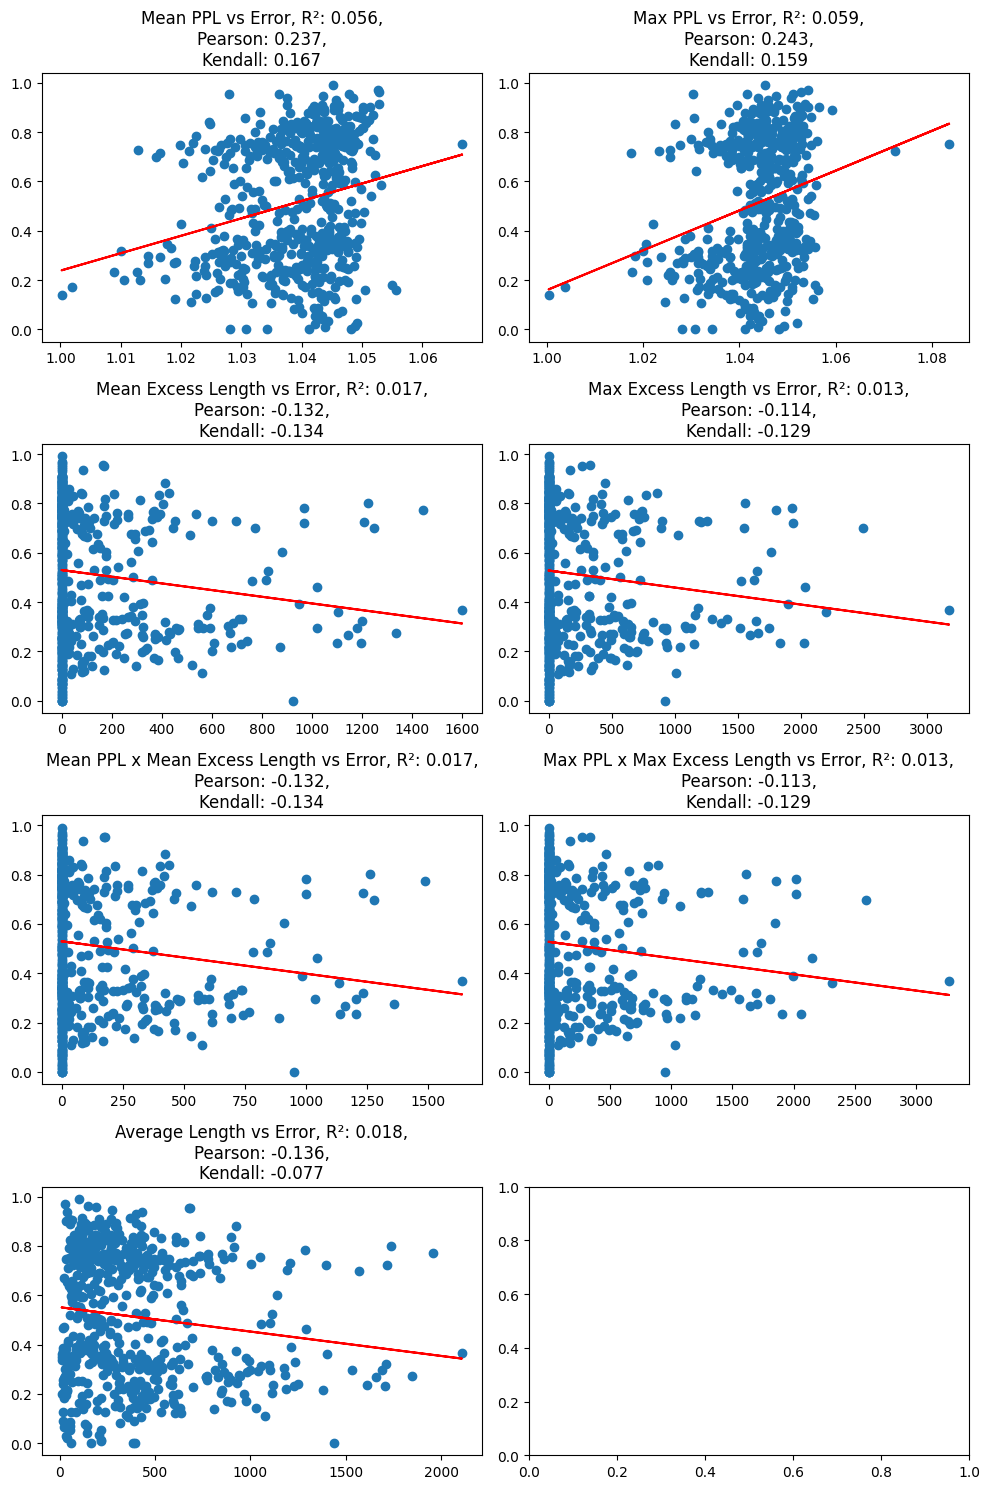

In [79]:
# let's also calculate the mean difference between the semantic and the codebert score 
# and let's look at the correlation / relationship between the mean PPL and the the error
import numpy as np
from sklearn.metrics import log_loss
new_pairs = []
for p in final_pairs:
    # p["semantic_codebert_diff"] = np.log(p["code_bert_score"]) * p["semantic_similarity"] + (1 - p["semantic_similarity"]) * np.log(1 - p["code_bert_score"]) if p["code_bert_score"] > 0 else 0
    # p["semantic_codebert_diff"] = log_loss([p["semantic_similarity"]], [p["code_bert_score"]])
    p["semantic_codebert_diff"] = np.abs(p["semantic_similarity"] - p["code_bert_score"])
    p["pplxexcess_len"] = p["mean_ppl"] * p["mean_excess_len"]
    p["pplxexcess_len_max"] = p["max_ppl"] * p["max_excess_len"]
    p["average_len"] = (p["prog_i_length"] + p["prog_j_length"]) / 2
    new_pairs.append(p)
    
# let's look at scatter plots and a correlation line between the error on the y, and mean ppl, max ppl, mean excess len, max excess len, and those products

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

errors = [p["semantic_codebert_diff"] for p in new_pairs]
mean_ppls = [p["mean_ppl"] for p in new_pairs]
max_ppls = [p["max_ppl"] for p in new_pairs]
mean_excess_lengths = [p["mean_excess_len"] for p in new_pairs]
max_excess_lengths = [p["max_excess_len"] for p in new_pairs]
pplxexcess_len = [p["pplxexcess_len"] for p in new_pairs]
pplxexcess_len_max = [p["pplxexcess_len_max"] for p in new_pairs]
average_len = [p["average_len"] for p in new_pairs]

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(4, 2, figsize=(10, 15))

data_pairs = [
    (mean_ppls, errors, "Mean PPL"),
    (max_ppls, errors, "Max PPL"),
    (mean_excess_lengths, errors, "Mean Excess Length"),
    (max_excess_lengths, errors, "Max Excess Length"),
    (pplxexcess_len, errors, "Mean PPL x Mean Excess Length"),
    (pplxexcess_len_max, errors, "Max PPL x Max Excess Length"), 
    (average_len, errors, "Average Length")
]

for i, (x, y, title) in enumerate(data_pairs):
    ax = axs[i // 2, i % 2]
    
    # filter nans 
    x = np.array(x)
    y = np.array(y)
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    # if PPL in title let's filter out the outliers
    # if title in ["Mean PPL", "Max PPL"]:
    #     # mask below 1.005 and above 1.06 
    #     mask = (x > 1.01) & (x < 1.06)
    #     x = x[mask]
    #     y = y[mask]
        
    ax.scatter(x, y)
    slope, intercept, r_value, _, _ = stats.linregress(x, y)
    line = slope * np.array(x) + intercept
    pearson_corr, _ = pearsonr(x, y)
    kendall_corr, _ = stats.kendalltau(x, y)
    ax.plot(x, line, color="red")
    ax.set_title(f"{title} vs Error, R²: {r_value**2:.3f},\nPearson: {pearson_corr:.3f},\nKendall: {kendall_corr:.3f}")

plt.tight_layout()
plt.show()



    

In [ ]:
! pip install code-bert-score

In [ ]:
# import code_bert_score
# prediction_idx = 0
# ref_idx = 1
# non_empty_results = [p for p in filtered_result_dicts[0]["extracted_programs"] if p.strip() != ""]
# print(f"Found {len(non_empty_results)} non-empty programs out of {len(filtered_result_dicts[0]['extracted_programs'])} total programs")

# predictions = [non_empty_results[prediction_idx]]
# references = [non_empty_results[ref_idx]]

# print(f"----------- Prediction -----------")
# print(f"Prediction: {predictions[0]}")
# print(f"----------- Reference -----------")
# print(f"Reference: {references[0]}")


# pred_results = code_bert_score.score(cands=predictions,
#                                      refs=references,
#                                      no_punc=True, lang='python')

# print("----------- CodeBERT Score -----------")
# print(f'Prediction precision: {pred_results[0][0]:.3f}, recall: {pred_results[1][0]:.3f}, f1: {pred_results[2][0]:.3f}, f3: {pred_results[3][0]:.3f}')

In [ ]:
import matplotlib.pyplot as plt

program_counts = [len([p for p in sample["extracted_programs"] if p.strip() != ""]) for sample in filtered_result_dicts]

plt.figure(figsize=(10, 6))
plt.hist(program_counts, bins=20, edgecolor='black')
plt.title('Histogram of Non-Empty Extracted Programs')
plt.xlabel('Number of Non-Empty Extracted Programs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import random
import code_bert_score
import numpy as np
from datetime import datetime

filtered_result_dicts = [
    sample for sample in filtered_result_dicts if len([p for p in sample["extracted_programs"] if p.strip() != ""]) > 0
]
max_num_programs = max(len([p for p in sample["extracted_programs"] if p.strip() != ""]) for sample in filtered_result_dicts)
print(f"Num of non-empty program examples: {len(filtered_result_dicts)} (max={max_num_programs})")

instruct_filtered_result_dicts = []
base_filtered_result_dicts = []
commercial_filtered_result_dicts = []
for sample in filtered_result_dicts:
    if "llama" in sample["experiment_name"].lower() and "instruct" in sample["experiment_name"].lower():
        instruct_filtered_result_dicts.append(sample)
    elif "llama" in sample["experiment_name"].lower():
        base_filtered_result_dicts.append(sample)
    else:
        commercial_filtered_result_dicts.append(sample)
print(len(instruct_filtered_result_dicts), len(base_filtered_result_dicts), len(commercial_filtered_result_dicts))
subsampled_result_dicts = random.sample(instruct_filtered_result_dicts, 10)
subsampled_result_dicts.extend(random.sample(base_filtered_result_dicts, 10))
subsampled_result_dicts.extend(random.sample(commercial_filtered_result_dicts, 10))

max_num_programs = max(len([p for p in sample["extracted_programs"] if p.strip() != ""]) for sample in subsampled_result_dicts)
print(f"Selected {len(subsampled_result_dicts)} samples (max={max_num_programs}).")
print(subsampled_result_dicts[29])

In [ ]:
pbar = tqdm(total=len(subsampled_result_dicts))
for sample in tqdm(subsampled_result_dicts, desc="Processing samples", unit="sample"):
    extracted_programs = sample["extracted_programs"]

    non_empty_programs = [p for p in extracted_programs if p.strip() != ""]

    if len(non_empty_programs) < 2:
        sample["avg_code_bert_extracted_programs_f1"] = None
        sample["avg_code_bert_extracted_programs_precision"] = None
        sample["avg_code_bert_extracted_programs_recall"] = None
        continue

    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Calculate average CodeBERT score for programs
    for i in range(len(non_empty_programs)):
        for j in range(len(non_empty_programs)):
            if i != j:
                predictions = [non_empty_programs[i]]
                references = [non_empty_programs[j]]

                score_results = code_bert_score.score(cands=predictions,
                                                      refs=references,
                                                      no_punc=True,
                                                      lang='python')
                
                precision_scores.append(score_results[0].item())  # Precision
                recall_scores.append(score_results[1].item())     # Recall
                f1_scores.append(score_results[2].item())         # F1 Score
                print(f"{i}/{len(non_empty_programs)} x {j}/{len(non_empty_programs)}:")
                print(f"Precision = {score_results[0].item()}")
                print(f"Recall = {score_results[1].item()}")
                print(f"F1 = {score_results[2].item()}")

    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    sample["avg_code_bert_extracted_programs_precision"] = avg_precision
    sample["avg_code_bert_extracted_programs_recall"] = avg_recall
    sample["avg_code_bert_extracted_programs_f1"] = avg_f1
    pbar.update(1)

In [ ]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = f"subsampled_{len(subsampled_result_dicts)}_result_dicts_programs_only_{timestamp}.json"
with open(output_file, 'w') as json_file:
    json.dump(subsampled_result_dicts, json_file, indent=4)

print(f"Results successfully saved to {output_file}")

In [ ]:
with open(output_file, 'r') as json_file:
    loaded_data = json.load(json_file)

count_with_f1 = sum(1 for sample in loaded_data if "avg_code_bert_extracted_programs_f1" in sample and sample["avg_code_bert_extracted_programs_f1"] is not None)

# Print the result
print(f"Number of datapoints with 'avg_code_bert_extracted_programs_f1': {count_with_f1}")